In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
from matplotlib import rc
rc("font", family="Malgun Gothic")

In [4]:
# 데이터를 불러오기 (첫 번째 행을 제외하고 가져옴)
# data1 = pd.read_csv('범죄의_공범수와_범행도구_2017_2022.csv', encoding='ANSI', skiprows=[0])
# data2 = pd.read_csv('절도수법_2017_2022.csv', encoding='ANSI')
# data3 = pd.read_csv('강도수법_2017_2022.csv', encoding='ANSI')

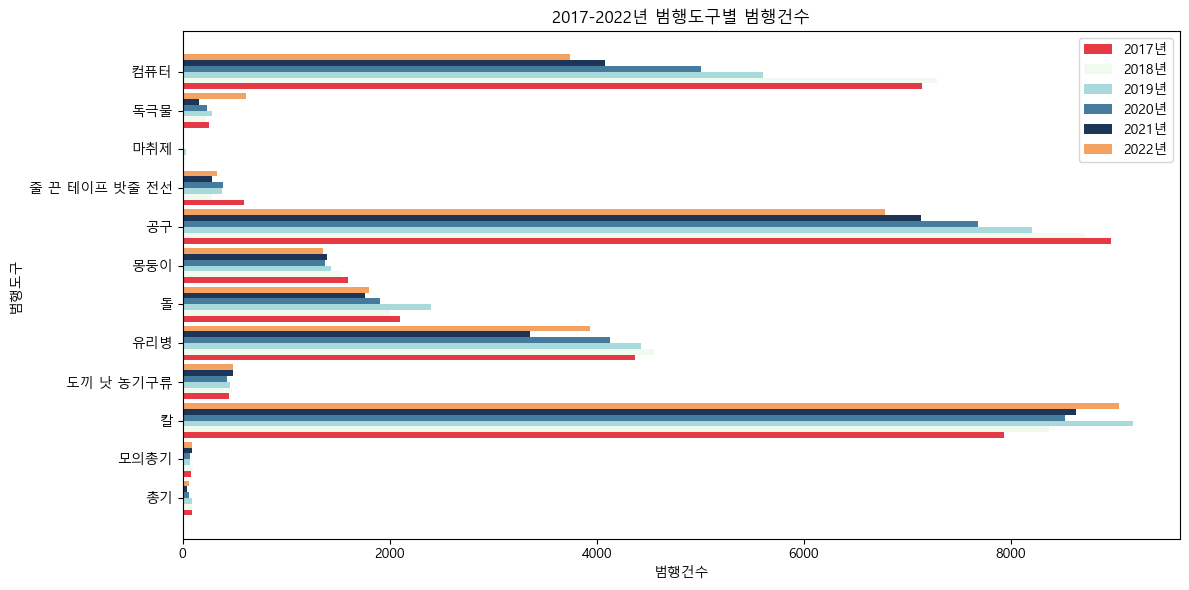

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import colors

rc('font', family='Malgun Gothic')

# CSV 파일 읽어오기
data1 = pd.read_csv("csv/crimetool_and_robbery/범죄의_공범수와_범행도구_2017_2022.csv", encoding="ANSI")

# 범행도구별(2) 열을 y축으로, 각 년도의 값을 x축으로 하는 수평 막대 그래프 그리기
plt.figure(figsize=(12, 6))

# 각 연도의 데이터를 모아둘 리스트
years = ['2017', '2018', '2019', '2020', '2021', '2022']
values = {year: [] for year in years}

# 각 범행도구별(2)에 대한 데이터를 추출하여 리스트에 추가 (소계 데이터는 제외)
for index, row in data1.iterrows():
    if row['범행도구별(2)'] != '소계':
        for year in years:
            values[year].append(row[year])

# 사용할 색상 리스트 정의
custom_colors = ['#E63946', '#F1FAEE', '#A8DADC', '#457B9D', '#1D3557', '#F4A261']

# 각 연도의 데이터 포인트를 하나의 수평 막대 그래프로 표현
bar_height = 0.15  # 막대 그래프의 높이 설정
y_indexes = range(len(data1[data1['범행도구별(2)'] != '소계']['범행도구별(2)']))  # y 축 인덱스 설정

for i, year in enumerate(years):
    plt.barh(
        [y + i * bar_height for y in y_indexes],
        values[year],
        height=bar_height,
        label=year + '년',
        color=custom_colors[i]  # 색상을 사용자가 정의한 리스트에서 선택
    )

plt.ylabel('범행도구')
plt.xlabel('범행건수')
plt.title('2017-2022년 범행도구별 범행건수')
plt.yticks([y + (len(years) - 1) * bar_height / 2 for y in y_indexes], data1[data1['범행도구별(2)'] != '소계']['범행도구별(2)'])
plt.legend(loc='best')
plt.tight_layout()
plt.show()


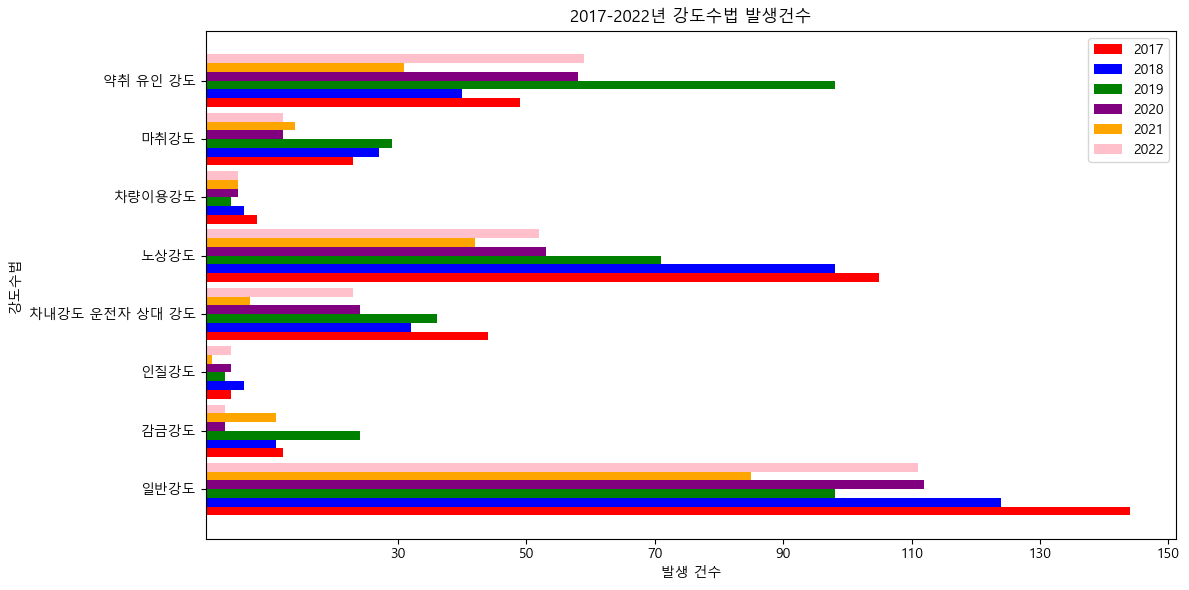

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


# CSV 파일 읽어오기
data1 = pd.read_csv("csv/crimetool_and_robbery/강도수법_2017_2022.csv", encoding="ANSI")

# 중복된 연도 열 이름 수정
data1 = data1.rename(columns={
    "2017": "2017_발생건수",
    "2018": "2018_발생건수",
    "2019": "2019_발생건수",
    "2020": "2020_발생건수",
    "2021": "2021_발생건수",
    "2022": "2022_발생건수"
})

# '강도수법별(2)' 열에서 '소계'와 NaN 값을 필터링하여 제외
filtered_data1 = data1[(data1['강도수법별(2)'] != '소계') & (~data1['강도수법별(2)'].isna())]

# X 축 데이터를 문자열로 변환
x_data = filtered_data1['강도수법별(2)'].astype(str)

# 각 연도의 데이터를 모아둘 리스트
years = ['2017_발생건수', '2018_발생건수', '2019_발생건수', '2020_발생건수', '2021_발생건수', '2022_발생건수']
values = {year: [] for year in years}

# "발생건수 (건)" 헤더를 제거하고 숫자로 변환
for year in years:
    values[year] = filtered_data1[year].str.replace('발생건수 \(건\)', '', regex=True).astype(int)

# 각 연도의 데이터 포인트를 하나의 선 그래프로 이어서 표현
plt.figure(figsize=(12, 6))
custom_colors = ['red', 'blue', 'green', 'purple', 'orange', 'pink']
bar_height = 0.15
x_indexes = range(len(x_data))  # x 축 인덱스 설정
for i, year in enumerate(years):
    plt.barh(
        [x + i * bar_height for x in x_indexes],
        values[year],
        height=bar_height,
        label=year[:-5],
        color=custom_colors[i]
    )

plt.xlabel('발생 건수')
plt.ylabel('강도수법')
plt.title('2017-2022년 강도수법 발생건수')
plt.yticks([x + (len(years) - 1) * bar_height / 2 for x in x_indexes], x_data)
plt.xticks(range(30, 160, 20))  # 원하는 범위와 간격으로 눈금 설정
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='Malgun Gothic')

# CSV 파일 읽어오기
data1 = pd.read_csv("csv/crimetool_and_robbery/절도수법_2017_2022.csv", encoding="ANSI")

# 중복된 연도 열 이름 수정
data1 = data1.rename(columns={
    "2017": "2017_발생건수",
    "2018": "2018_발생건수",
    "2019": "2019_발생건수",
    "2020": "2020_발생건수",
    "2021": "2021_발생건수",
    "2022": "2022_발생건수"
})

# '절도수법별(2)' 열에서 '소계', '절도수법별(2)' 및 NaN 값을 필터링하여 제외
filtered_data1 = data1[~data1['절도수법별(2)'].isin(['소계', '절도수법별(2)']) & (~data1['절도수법별(2)'].isna())]


# X 축 데이터를 문자열로 변환
x_data = filtered_data1['절도수법별(2)'].astype(str)

# 각 연도의 데이터를 모아둘 리스트
years = ['2017_발생건수', '2018_발생건수', '2019_발생건수', '2020_발생건수', '2021_발생건수', '2022_발생건수']
values = {year: [] for year in years}

# "발생건수 (건)" 헤더를 제거하고 숫자로 변환
for year in years:
    values[year] = filtered_data1[year].str.replace('발생건수 \(건\)', '', regex=True)
    values[year] = pd.to_numeric(values[year], errors='coerce')  # 비어있는 값을 NaN으로 처리

# NaN 값을 0으로 대체
values = {year: values[year].fillna(0) for year in years}

# 각 연도의 데이터 포인트를 하나의 선 그래프로 이어서 표현
plt.figure(figsize=(12, 6))
custom_colors = ['red', 'blue', 'green', 'purple', 'orange', 'pink']
bar_height = 0.15
x_indexes = range(len(x_data))  # x 축 인덱스 설정
for i, year in enumerate(years):
    plt.barh(
        [x + i * bar_height for x in x_indexes],
        values[year],
        height=bar_height,
        label=year[:-5],
        color=custom_colors[i]
    )

plt.xlabel('발생 건수')
plt.ylabel('절도수법')
plt.title('2017-2022년 절도수법 발생건수')
plt.xticks(range(1000, 20000, 3000))  # 원하는 범위와 간격으로 눈금 설정
plt.yticks([x + (len(years) - 1) * bar_height / 2 for x in x_indexes], x_data)
plt.legend(loc='best')
plt.tight_layout()
plt.show();


FileNotFoundError: [Errno 2] No such file or directory: 'csv/crimetool_and_robbery/절도수법_2017_2022.csv'

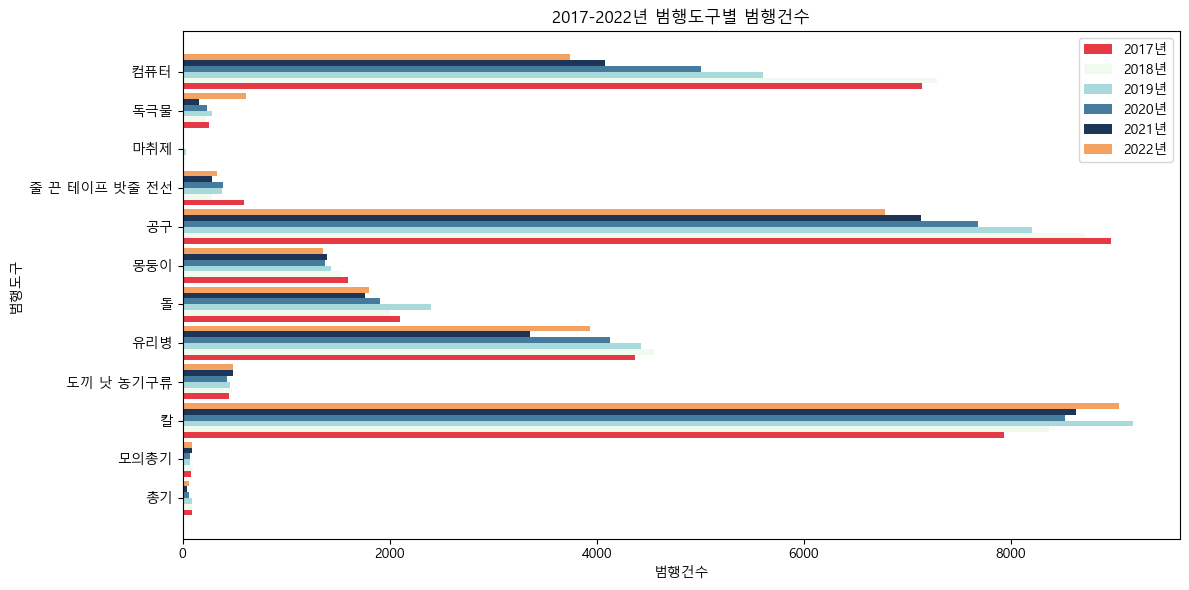

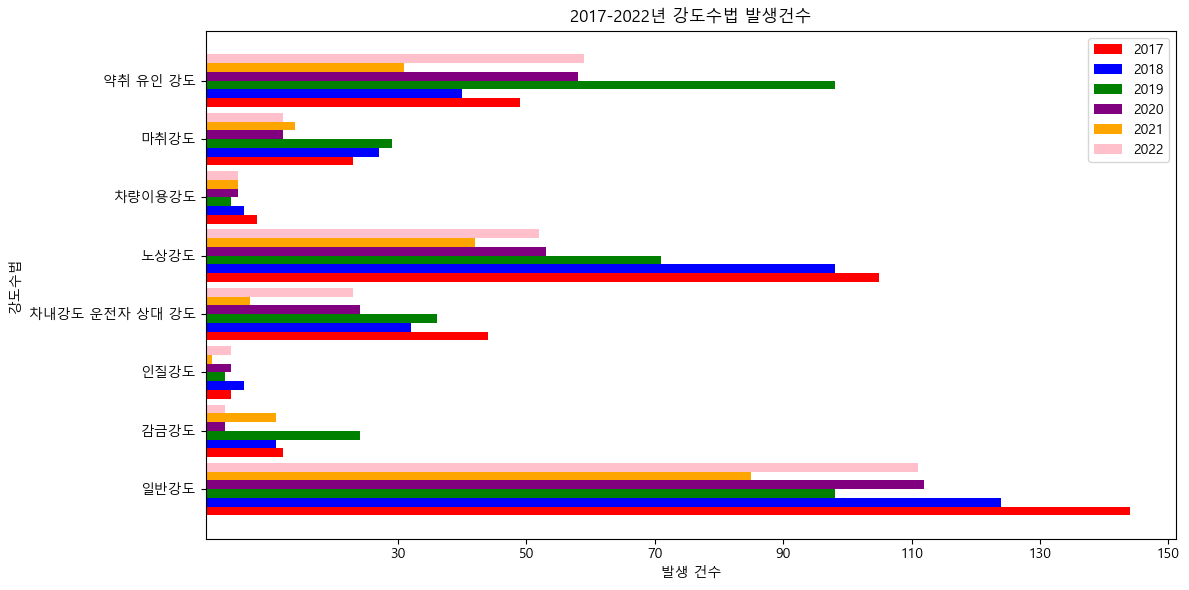

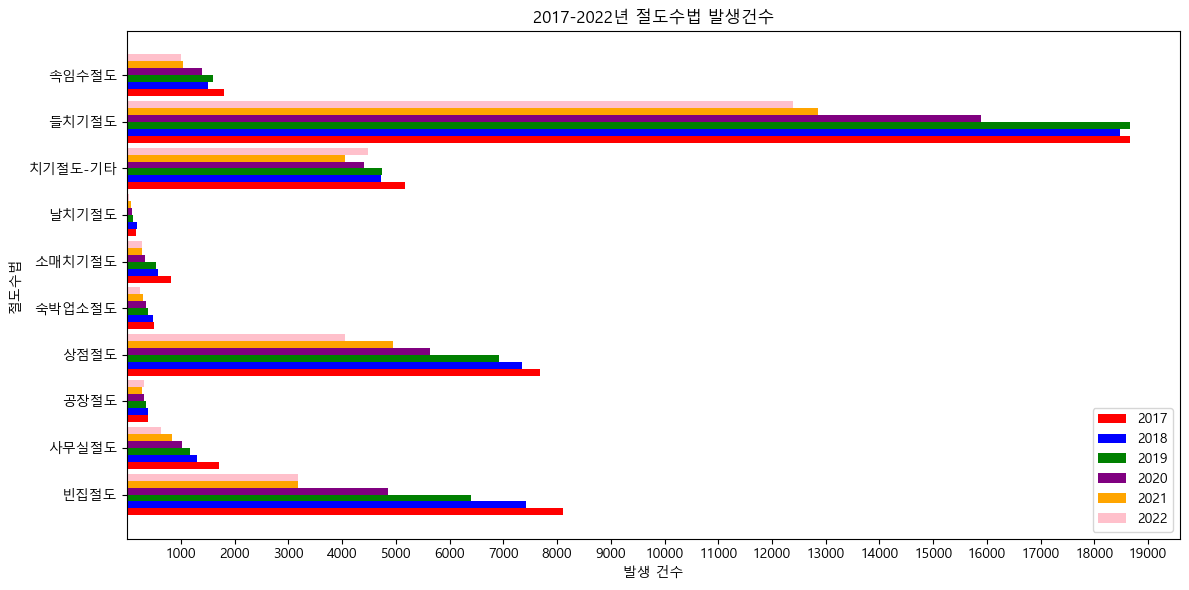

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import colors

rc('font', family='Malgun Gothic')

# CSV 파일 읽어오기
data1 = pd.read_csv("csv/crimetool_and_robbery/범죄의_공범수와_범행도구_2017_2022.csv", encoding="ANSI")

# 범행도구별(2) 열을 y축으로, 각 년도의 값을 x축으로 하는 수평 막대 그래프 그리기
plt.figure(figsize=(12, 6))

# 각 연도의 데이터를 모아둘 리스트
years = ['2017', '2018', '2019', '2020', '2021', '2022']
values = {year: [] for year in years}

# 각 범행도구별(2)에 대한 데이터를 추출하여 리스트에 추가 (소계 데이터는 제외)
for index, row in data1.iterrows():
    if row['범행도구별(2)'] != '소계':
        for year in years:
            values[year].append(row[year])

# 사용할 색상 리스트 정의
custom_colors = ['#E63946', '#F1FAEE', '#A8DADC', '#457B9D', '#1D3557', '#F4A261']

# 각 연도의 데이터 포인트를 하나의 수평 막대 그래프로 표현
bar_height = 0.15  # 막대 그래프의 높이 설정
y_indexes = range(len(data1[data1['범행도구별(2)'] != '소계']['범행도구별(2)']))  # y 축 인덱스 설정

for i, year in enumerate(years):
    plt.barh(
        [y + i * bar_height for y in y_indexes],
        values[year],
        height=bar_height,
        label=year + '년',
        color=custom_colors[i]  # 색상을 사용자가 정의한 리스트에서 선택
    )

plt.ylabel('범행도구')
plt.xlabel('범행건수')
plt.title('csv/crimetool_and_robbery/2017-2022년 범행도구별 범행건수')
plt.yticks([y + (len(years) - 1) * bar_height / 2 for y in y_indexes], data1[data1['범행도구별(2)'] != '소계']['범행도구별(2)'])
plt.legend(loc='best')
plt.tight_layout()
plt.show()


#============================================================
# CSV 파일 읽어오기
data2 = pd.read_csv("강도수법_2017_2022.csv", encoding="ANSI")

# 중복된 연도 열 이름 수정
data2 = data2.rename(columns={
    "2017": "2017_발생건수",
    "2018": "2018_발생건수",
    "2019": "2019_발생건수",
    "2020": "2020_발생건수",
    "2021": "2021_발생건수",
    "2022": "2022_발생건수"
})

# '강도수법별(2)' 열에서 '소계'와 NaN 값을 필터링하여 제외
filtered_data2 = data2[(data2['강도수법별(2)'] != '소계') & (~data2['강도수법별(2)'].isna())]

# X 축 데이터를 문자열로 변환
x_data = filtered_data2['강도수법별(2)'].astype(str)

# 각 연도의 데이터를 모아둘 리스트
years = ['2017_발생건수', '2018_발생건수', '2019_발생건수', '2020_발생건수', '2021_발생건수', '2022_발생건수']
values = {year: [] for year in years}

# "발생건수 (건)" 헤더를 제거하고 숫자로 변환
for year in years:
    values[year] = filtered_data2[year].str.replace('발생건수 \(건\)', '', regex=True).astype(int)

# 각 연도의 데이터 포인트를 하나의 선 그래프로 이어서 표현
plt.figure(figsize=(12, 6))
custom_colors = ['red', 'blue', 'green', 'purple', 'orange', 'pink']
bar_height = 0.15
x_indexes = range(len(x_data))  # x 축 인덱스 설정
for i, year in enumerate(years):
    plt.barh(
        [x + i * bar_height for x in x_indexes],
        values[year],
        height=bar_height,
        label=year[:-5],
        color=custom_colors[i]
    )

plt.xlabel('발생 건수')
plt.ylabel('강도수법')
plt.title('2017-2022년 강도수법 발생건수')
plt.yticks([x + (len(years) - 1) * bar_height / 2 for x in x_indexes], x_data)
plt.xticks(range(30, 160, 20))  # 원하는 범위와 간격으로 눈금 설정
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#============================================================

# CSV 파일 읽어오기
data3 = pd.read_csv("csv/crimetool_and_robbery/절도수법_2017_2022.csv", encoding="ANSI")

# 중복된 연도 열 이름 수정
data3 = data3.rename(columns={
    "2017": "2017_발생건수",
    "2018": "2018_발생건수",
    "2019": "2019_발생건수",
    "2020": "2020_발생건수",
    "2021": "2021_발생건수",
    "2022": "2022_발생건수"
})

# '절도수법별(2)' 열에서 '소계'와 NaN 값을 필터링하여 제외
filtered_data3 = data3[(data3['절도수법별(2)'] != '소계') & (~data3['절도수법별(2)'].isna())]
filtered_data3 = filtered_data3[filtered_data3['절도수법별(2)'] != '절도수법별(2)']

# X 축 데이터를 문자열로 변환
x_data = filtered_data3['절도수법별(2)'].astype(str)

# 각 연도의 데이터를 모아둘 리스트
years = ['2017_발생건수', '2018_발생건수', '2019_발생건수', '2020_발생건수', '2021_발생건수', '2022_발생건수']
values = {year: [] for year in years}

# "발생건수 (건)" 헤더를 제거하고 숫자로 변환
for year in years:
    values[year] = filtered_data3[year].str.replace('발생건수 \(건\)', '', regex=True)
    values[year] = pd.to_numeric(values[year], errors='coerce')  # 비어있는 값을 NaN으로 처리

# NaN 값을 0으로 대체
values = {year: values[year].fillna(0) for year in years}

# 각 연도의 데이터 포인트를 하나의 선 그래프로 이어서 표현
plt.figure(figsize=(12, 6))
custom_colors = ['red', 'blue', 'green', 'purple', 'orange', 'pink']
bar_height = 0.15
x_indexes = range(len(x_data))  # x 축 인덱스 설정
for i, year in enumerate(years):
    plt.barh(
        [x + i * bar_height for x in x_indexes],
        values[year],
        height=bar_height,
        label=year[:-5],
        color=custom_colors[i]
    )

plt.xlabel('발생 건수')
plt.ylabel('절도수법')
plt.title('2017-2022년 절도수법 발생건수')
plt.yticks([x + (len(years) - 1) * bar_height / 2 for x in x_indexes], x_data)
plt.xticks(range(1000, 20000, 1000))  # 원하는 범위와 간격으로 눈금 설정
plt.legend(loc='best')
plt.tight_layout()
plt.show()


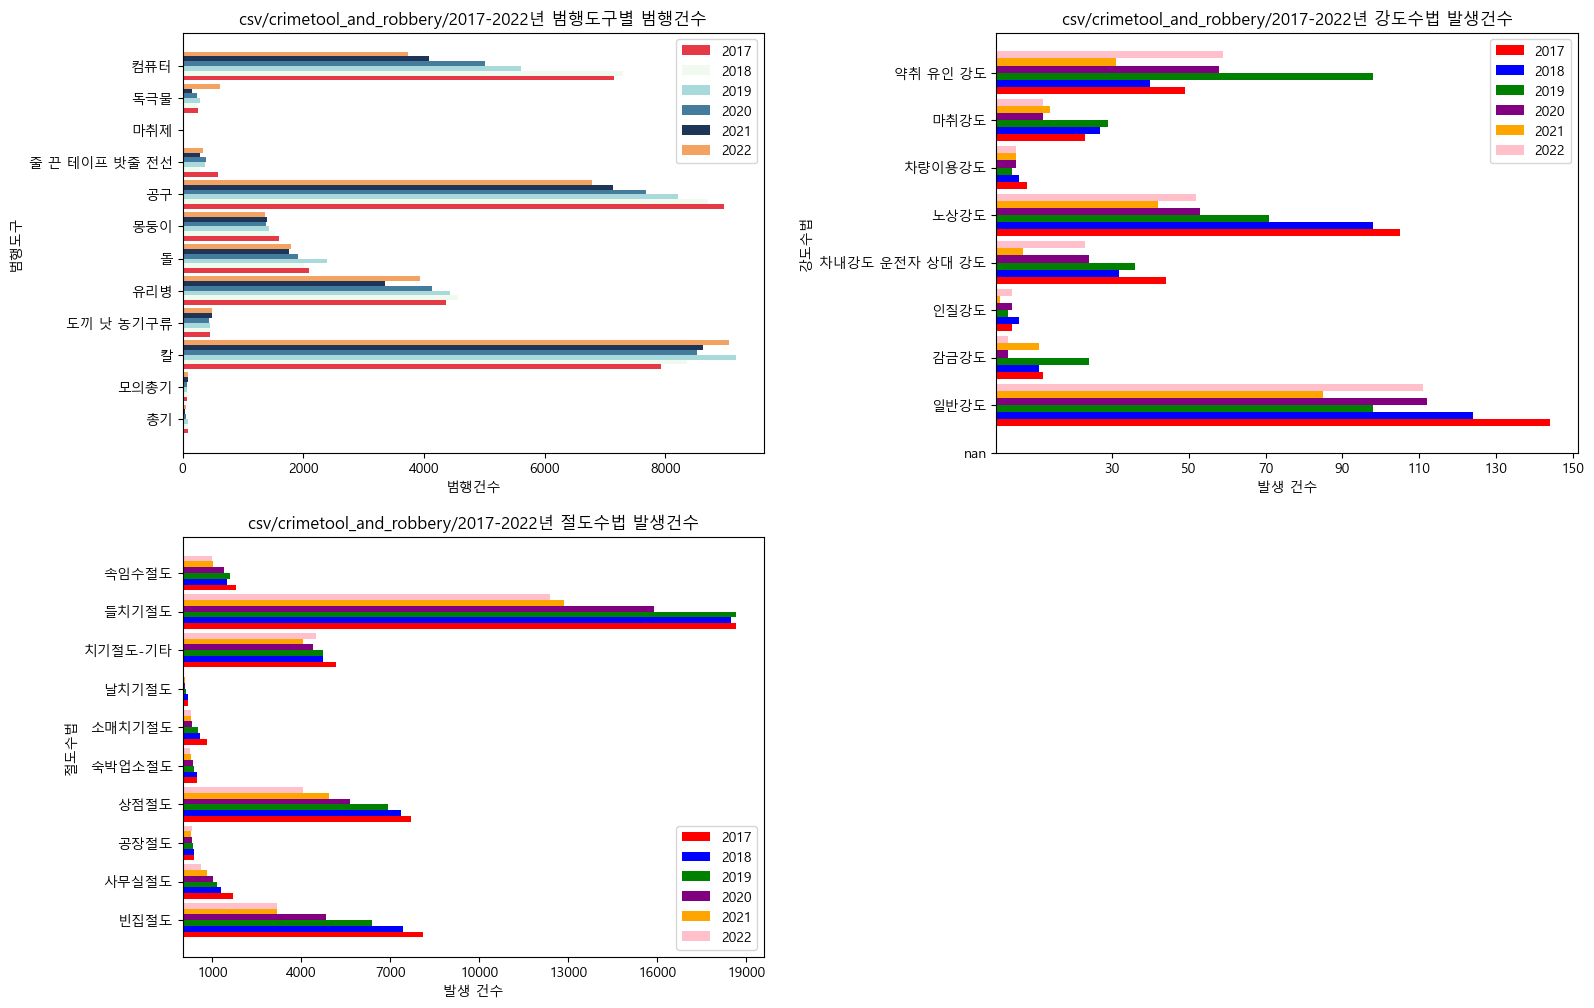

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc

# 한글 폰트 설정
rc('font', family='Malgun Gothic')

# CSV 파일 읽어오기
data1 = pd.read_csv("csv/crimetool_and_robbery/범죄의_공범수와_범행도구_2017_2022.csv", encoding="ANSI")
data2 = pd.read_csv("csv/crimetool_and_robbery/강도수법_2017_2022.csv", encoding="ANSI")
data3 = pd.read_csv("csv/crimetool_and_robbery/절도수법_2017_2022.csv", encoding="ANSI")

# 그래프 크기 설정
plt.figure(figsize=(18, 12))

# Subplot 1: 범행도구별 범행건수
plt.subplot(2, 2, 1)
years1 = ['2017', '2018', '2019', '2020', '2021', '2022']
values1 = {year: [] for year in years1}

for index, row in data1.iterrows():
    if row['범행도구별(2)'] != '소계':
        for year in years1:
            values1[year].append(row[year])

custom_colors = ['#E63946', '#F1FAEE', '#A8DADC', '#457B9D', '#1D3557', '#F4A261']
bar_height = 0.15
y_indexes1 = range(len(data1[data1['범행도구별(2)'] != '소계']['범행도구별(2)']))

for i, year in enumerate(years1):
    plt.barh(
        [y + i * bar_height for y in y_indexes1],
        values1[year],
        height=bar_height,
        label=year ,
        color=custom_colors[i]
    )

plt.ylabel('범행도구')
plt.xlabel('범행건수')
plt.title('csv/crimetool_and_robbery/2017-2022년 범행도구별 범행건수')
plt.yticks([y + (len(years1) - 1) * bar_height / 2 for y in y_indexes1], data1[data1['범행도구별(2)'] != '소계']['범행도구별(2)'])
plt.legend(loc='best')

# Subplot 2: 강도수법 발생건수
plt.subplot(2, 2, 2)
x_data2 = data2[data2['강도수법별(2)'] != '소계']['강도수법별(2)'].astype(str)
years2 = ['2017', '2018', '2019', '2020', '2021', '2022']  # 수정된 열 이름
values2 = {year: [] for year in years2}

for year in years2:
    values2[year] = data2[data2['강도수법별(2)'] != '소계'][year].str.replace('발생건수 \(건\)', '', regex=True)
    values2[year] = pd.to_numeric(values2[year], errors='coerce')  # 비어있는 값을 NaN으로 처리

custom_colors = ['red', 'blue', 'green', 'purple', 'orange', 'pink']
bar_height = 0.15
x_indexes2 = range(len(x_data2))

for i, year in enumerate(years2):
    plt.barh(
        [x + i * bar_height for x in x_indexes2],
        values2[year],
        height=bar_height,
        label=year,
        color=custom_colors[i]
    )

plt.xlabel('발생 건수')
plt.ylabel('강도수법')
plt.title('csv/crimetool_and_robbery/2017-2022년 강도수법 발생건수')
plt.yticks([x + (len(years2) - 1) * bar_height / 2 for x in x_indexes2], x_data2)
plt.xticks(range(30, 160, 20))
plt.legend(loc='best')

# Subplot 3: 절도수법 발생건수
plt.subplot(2, 2, 3)

# 중복된 연도 열 이름 수정
data3 = data3.rename(columns={
    "2017": "2017_발생건수",
    "2018": "2018_발생건수",
    "2019": "2019_발생건수",
    "2020": "2020_발생건수",
    "2021": "2021_발생건수",
    "2022": "2022_발생건수"
})

# '절도수법별(2)' 열에서 '소계'와 NaN 값을 필터링하여 제외
filtered_data3 = data3[(data3['절도수법별(2)'] != '소계') & (~data3['절도수법별(2)'].isna())]
filtered_data3 = filtered_data3[filtered_data3['절도수법별(2)'] != '절도수법별(2)']

# X 축 데이터를 문자열로 변환
x_data = filtered_data3['절도수법별(2)'].astype(str)

# 각 연도의 데이터를 모아둘 리스트
years = ['2017_발생건수', '2018_발생건수', '2019_발생건수', '2020_발생건수',
         '2021_발생건수', '2022_발생건수']
values = {year: [] for year in years}

# "발생건수 (건)" 헤더를 제거하고 숫자로 변환
for year in years:
    values[year] = filtered_data3[year].str.replace('발생건수 \(건\)', '', regex=True)
    values[year] = pd.to_numeric(values[year], errors='coerce')  # 비어있는 값을 NaN으로 처리

# NaN 값을 0으로 대체
values = {year: values[year].fillna(0) for year in years}

# 각 연도의 데이터 포인트를 하나의 선 그래프로 이어서 표현
custom_colors = ['red', 'blue', 'green', 'purple', 'orange', 'pink']
bar_height = 0.15
x_indexes = range(len(x_data))  # x 축 인덱스 설정
for i, year in enumerate(years):
    plt.barh(
        [x + i * bar_height for x in x_indexes],
        values[year],
        height=bar_height,
        label=year[:-5],
        color=custom_colors[i]
    )

plt.xlabel('발생 건수')
plt.ylabel('절도수법')
plt.title('csv/crimetool_and_robbery/2017-2022년 절도수법 발생건수')
plt.yticks([x + (len(years) - 1) * bar_height / 2 for x in x_indexes], x_data)
plt.xticks(range(1000, 20000, 3000))  # 원하는 범위와 간격으로 눈금 설정
plt.legend(loc='best')

# 서브플롯 간 간격 조절
plt.subplots_adjust(wspace=0.4)

# 그래프 출력
plt.show()


카이제곱 통계량: 4079.7873674879947
p-value: 0.0


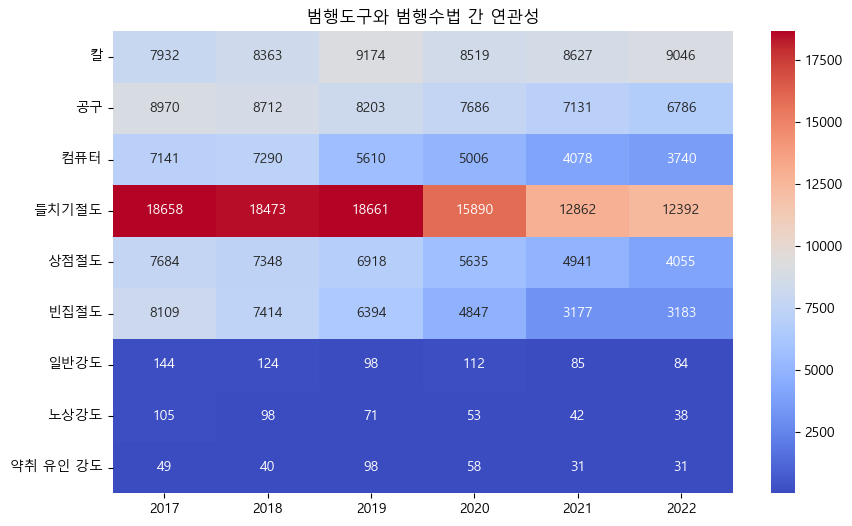

In [14]:
# import numpy as np
# import pandas as pd
# import scipy.stats as stats
# import seaborn as sns
# import matplotlib.pyplot as plt

# # 데이터를 DataFrame으로 정리
# data = np.array([[7932, 8363, 9174, 8519, 8627, 9046],
#                  [8970, 8712, 8203, 7686, 7131, 6786],
#                  [7141, 7290, 5610, 5006, 4078, 3740],
#                  [18658, 18473, 18661, 15890, 12862, 12392],
#                  [7684, 7348, 6918, 5635, 4941, 4055],
#                  [8109, 7414, 6394, 4847, 3177, 3183],
#                  [144, 124, 98, 112, 85, 84],
#                  [105, 98, 71, 53, 42, 38],
#                  [49, 40, 98, 58, 31, 31]])

# # 데이터를 DataFrame으로 변환
# df = pd.DataFrame(data, columns=[2017, 2018, 2019, 2020, 2021, 2022],
#                   index=["칼", "공구", "컴퓨터", "들치기절도", "상점절도", "빈집절도", "일반강도", "노상강도", "약취 유인 강도"])

# # 카이제곱 검정 실행
# chi2, p, _, _ = stats.chi2_contingency(df)

# # 결과 출력
# print(f"카이제곱 통계량: {chi2}")
# print(f"p-value: {p}")

# # 시각화 - 히트맵
# plt.figure(figsize=(10, 6))
# sns.heatmap(df, annot=True, fmt='d', cmap='coolwarm')
# plt.title('범행도구와 범행수법 간 연관성')
# plt.show()
